# Customizing Ticks

The object hierarchy of Matplotlib plots:

Matplotlib aims to have a Python object representing everything that appears on the plot: for example, recall that the `figure` is the bounding box within which plot elements appear. Each Matplotlib object can also act as a container of sub-objects: for example, each `figure` can contain one or more `axes` objects, each of which in turn contain other objects representing plot contents.

The tick marks are no exception. **Each `axes` has attributes `xaxis` and `yaxis`, which in turn have attributes that contain all the properties of the lines, ticks, and labels that make up the axes.**

## Major and Minor Ticks

**Major** ticks are usually **bigger** or more pronounced, while **minor** ticks are usually **smaller**. By default, Matplotlib rarely makes use of minor ticks, but one place you can see them is within logarithmic plots:

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np

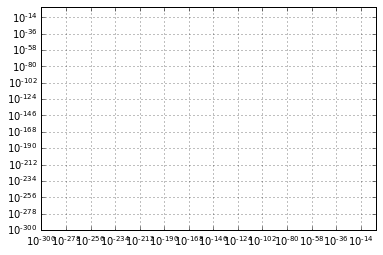

In [2]:
ax = plt.axes(xscale='log', yscale='log')
ax.grid();

Each major tick shows a large tickmark and a label, while each minor tick shows a smaller tickmark with **no** label.

These tick properties—locations and labels—that is, can be customized by setting the `locator` and `formatter` objects of each axis. 

In [5]:
print(ax.xaxis.get_major_locator())
print(ax.xaxis.get_minor_locator())

In [6]:
print(ax.xaxis.get_major_formatter())
print(ax.xaxis.get_minor_formatter())

Both major and minor tick labels have their locations specified by a `LogLocator` (which makes sense for a logarithmic plot). Minor ticks, though, have their labels formatted by a `NullFormatter`: this says that NO labels will be shown.

## Hiding Ticks or Labels

This can be done using `plt.NullLocator()` and `plt.NullFormatter()`

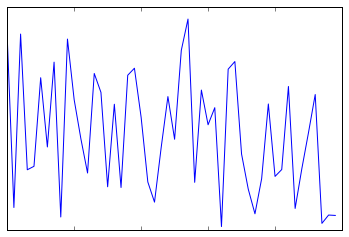

In [13]:
ax = plt.axes()
ax.plot(np.random.rand(50))

ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())

Notice that we've removed the labels (but kept the ticks/gridlines) from the x axis, and removed the ticks (and thus the labels as well) from the y axis. 

Having no ticks at all can be useful in many situations—for example, when you want to show a grid of images.

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/EckoTan/scikit_learn_data


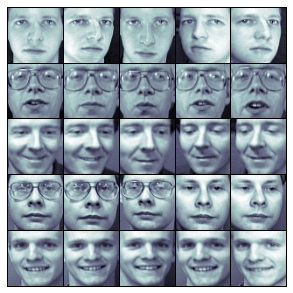

In [15]:
fig, ax = plt.subplots(5, 5, figsize=(5, 5))
fig.subplots_adjust(hspace=0, wspace=0)

from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces().images

for i in range(5):
    for j in range(5):
        ax[i, j].xaxis.set_major_locator(plt.NullLocator())
        ax[i, j].yaxis.set_major_locator(plt.NullLocator())
        ax[i, j].imshow(faces[10 * i + j], cmap='bone')

Each image has its own axes, and we've set the locators to null because the tick values (pixel number in this case) do not convey relevant information for this particular visualization.

## Reducing or Increasing the Number of Ticks

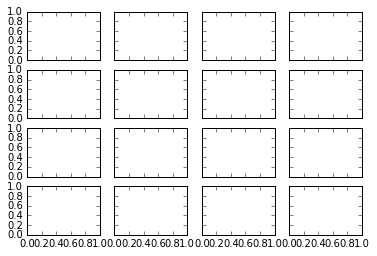

In [17]:
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)

Problem: Particularly for the x ticks, the numbers nearly overlap and make them quite difficult to decipher. 

We can fix this with the `plt.MaxNLocator()`, which allows us to specify the maximum number of ticks that will be displayed. Given this maximum number, Matplotlib will use internal logic to choose the particular tick locations:

In [26]:
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(2))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))
    
fig

AttributeError: 'AxesSubplot' object has no attribute 'flat'

## Fancy Tick Formats

Consider this plot of a sine and a cosine:

(0, 9.42477796076938)

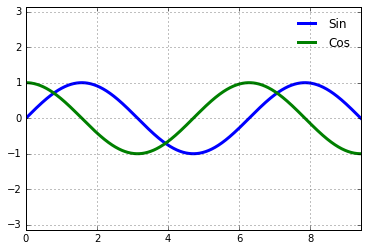

In [21]:
fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='Sin')
ax.plot(x, np.cos(x), lw=3, label='Cos')

ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0, 3 * np.pi)

There are a couple changes we might like to make. 

- First, it's more natural for this data to space the ticks and grid lines in multiples of $\pi$. We can do this by setting a `MultipleLocator`, which locates ticks at a multiple of the number you provide.

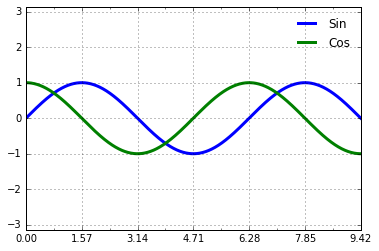

In [22]:
# Set major and minor ticks in multiples of pi/4
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))
fig

But now these tick labels look a little bit silly: we can see that they are multiples of $\pi$, but the decimal representation does not immediately convey this. 

To fix this, we can change the tick formatter. There's no built-in formatter for what we want to do, so we'll instead use `plt.FuncFormatter`, which accepts a user-defined function giving fine-grained control over the tick outputs:



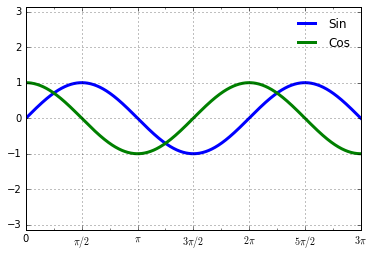

In [25]:
def format_func(value, tick_number):
    # find num of multiples of pi/2
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return 0
    elif N == 1:
        return r'$\pi/2$'
    elif N == 2:
        return r'$\pi$'
    elif N % 2 > 0:
        return r'${0}\pi/2$'.format(N)
    else:
        return r"${0}\pi$".format(N // 2)
    
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
fig

## Summary of Formatters and Locators

Built-in locator and formatter options:

| Locator class      | Description                                             |
| :----------------- | :------------------------------------------------------ |
| `NullLocator`      | No ticks                                                |
| `FixedLocator`     | Tick locations are fixed                                |
| `IndexLocator`     | Locator for index plots (e.g., where x = range(len(y))) |
| `LinearLocator`    | Evenly spaced ticks from min to max                     |
| `LogLocator`       | Logarithmically ticks from min to max                   |
| `MultipleLocator`  | Ticks and range are a multiple of base                  |
| `MaxNLocator`      | Finds up to a max number of ticks at nice locations     |
| `AutoLocator`      | (Default.) MaxNLocator with simple defaults.            |
| `AutoMinorLocator` | Locator for minor ticks                                 |

| Formatter Class      | Description                             |
| :------------------- | :-------------------------------------- |
| `NullFormatter`      | No labels on the ticks                  |
| `IndexFormatter`     | Set the strings from a list of labels   |
| `FixedFormatter`     | Set the strings manually for the labels |
| `FuncFormatter`      | User-defined function sets the labels   |
| `FormatStrFormatter` | Use a format string for each value      |
| `ScalarFormatter`    | (Default.) Formatter for scalar values  |
| `LogFormatter`       | Default formatter for log axes          |

